In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_2d = pd.read_csv('data_2d.csv')
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [2]:
# Dropped the first column as it does not affect clustering and renamed the rest of the columns
data_2d_cleaned = data_2d.iloc[:, 1:]
data_2d_cleaned.columns = ['Feature_1', 'Feature_2']

data_2d_cleaned.head()

,Feature_1,Feature_2
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


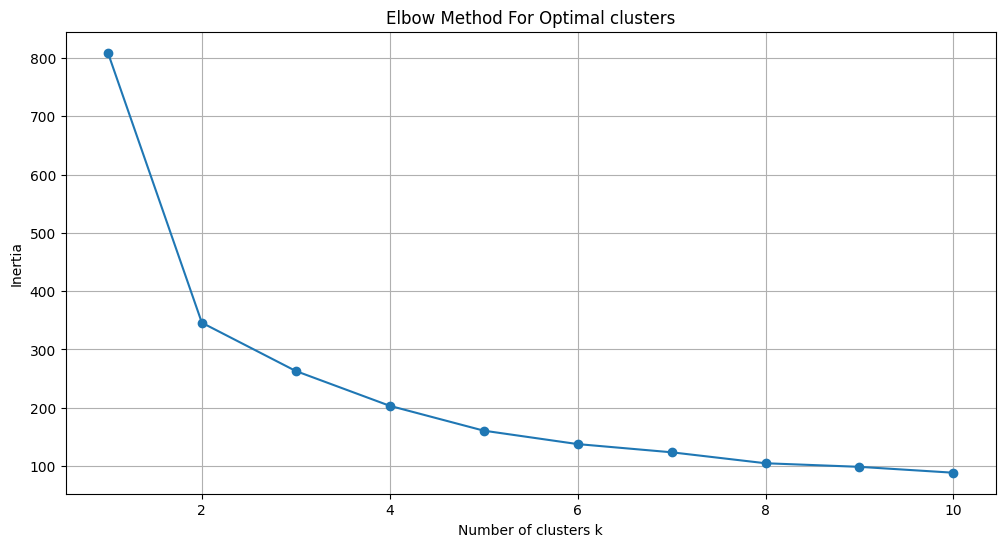

In [3]:
# Applied the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_2d_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(12,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal clusters')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


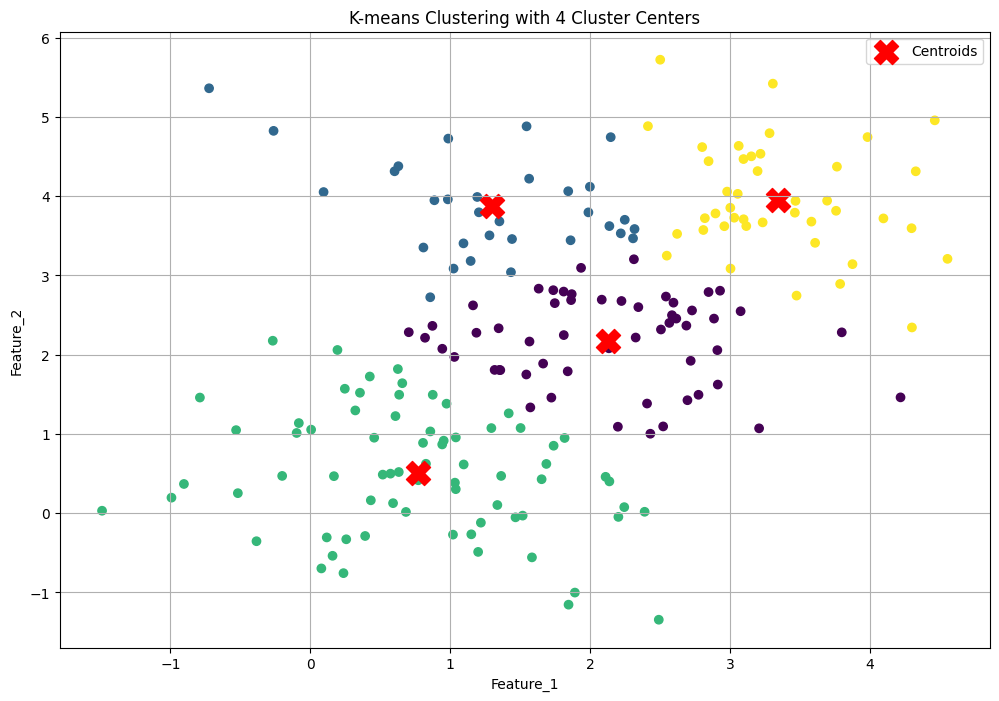

In [4]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data_2d_cleaned)

plt.figure(figsize=(12, 8))
plt.scatter(data_2d_cleaned['Feature_1'], data_2d_cleaned['Feature_2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering with {n_clusters} Cluster Centers')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.legend()

plt.show()